# 10wk-037: 아이스크림 – 의사결정나무, `max_depth`

최규빈  
2023-11-10

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-zMB0zUn5uWT722eagWFDG3&si=vU6BMNkqwL0VM5Sx>

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
import IPython
import sklearn.tree
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [2]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
eps = np.random.randn(100)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 
df_train = pd.DataFrame({'temp':temp,'sales':icecream_sales})
df_train

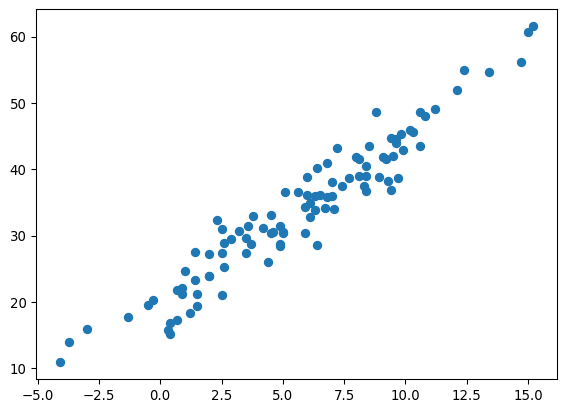

In [3]:
plt.plot(df_train.temp,df_train.sales,'o')

# 4. `DecisionTreeRegressor` (`max_depth`)

## A. `max_depth`=1

`-` step1~4

In [4]:
## step1
X = df_train[['temp']]
y = df_train['sales']
## step2
predictr = sklearn.tree.DecisionTreeRegressor(max_depth=1) 
## step3 
predictr.fit(X,y) 
## step4 -- pass 
# predictr.predict(X) 

`-` 결과 시각화

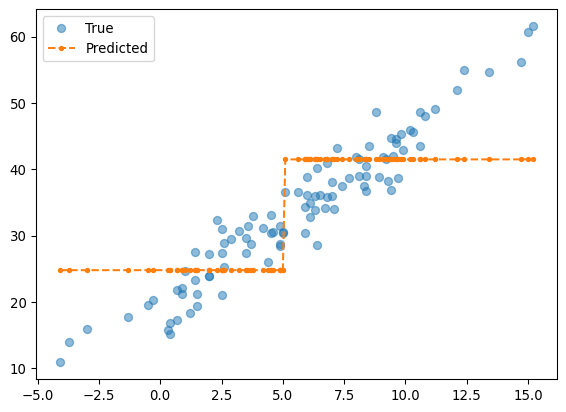

In [5]:
plt.plot(X,y,'o',alpha=0.5,label='True')
plt.plot(X,predictr.predict(X),'--.',label='Predicted')
plt.legend()

`-` tree 시각화

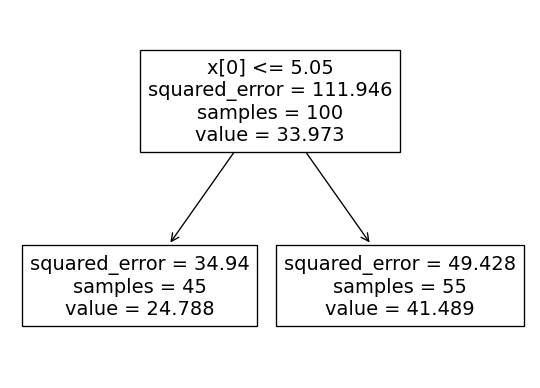

In [6]:
sklearn.tree.plot_tree(predictr)

## B. `max_depth`=2

`-` step1~4

In [7]:
## step1
X = df_train[['temp']]
y = df_train['sales']
## step2
predictr = sklearn.tree.DecisionTreeRegressor(max_depth=2) 
## step3 
predictr.fit(X,y) 
## step4 -- pass 
# predictr.predict(X) 

`-` 결과 시각화

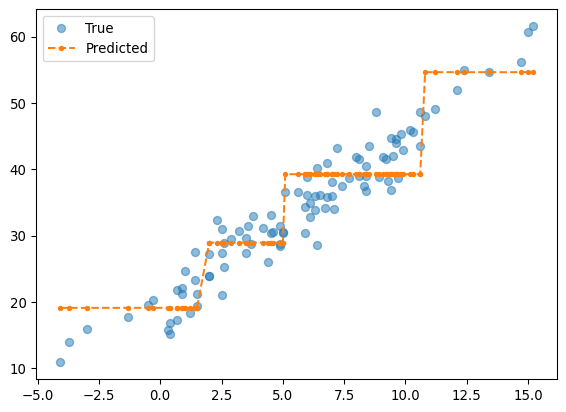

In [8]:
plt.plot(X,y,'o',alpha=0.5,label='True')
plt.plot(X,predictr.predict(X),'.--',label='Predicted')
plt.legend()

`-` tree 시각화

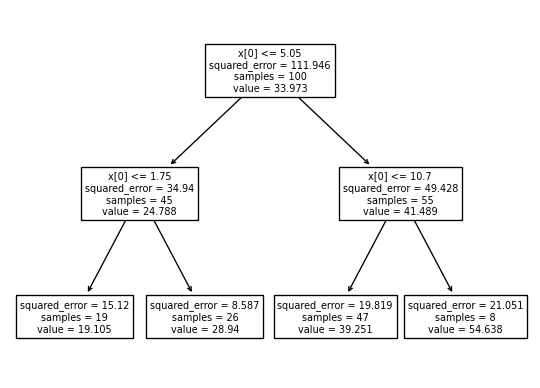

In [9]:
sklearn.tree.plot_tree(predictr)

## C. 애니메이션

`-` step1~4

In [10]:
## step1 
X = df_train[['temp']]
y = df_train['sales']
## step2
predictrs = [sklearn.tree.DecisionTreeRegressor(max_depth=k) for k in range(1,11)]
## step3 
for k in range(10):
    predictrs[k].fit(X,y)
## step4 -- pass

`-` 애니메이션

In [11]:
fig = plt.figure()

In [12]:
def func(frame):
    ax = fig.gca()
    ax.clear()
    ax.plot(X,y,'o',alpha=0.5) 
    ax.plot(X,predictrs[frame].predict(X),'.--') 
    ax.set_title(f'max_depth={predictrs[frame].max_depth}')

In [13]:
ani = matplotlib.animation.FuncAnimation(
    fig,
    func,
    frames=10
)

In [14]:
display(IPython.display.HTML(ani.to_jshtml()))